# Homework 3
# Classification models on Breast-Cancer Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

plt.style.use('ggplot')
%matplotlib inline

In [2]:
#First we retrieve the data
breastCancer = pd.read_csv('data/breast-cancer-wisconsin.data.csv')
breastCancer.info()
breastCancer.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id                        699 non-null int64
clump_thickness           699 non-null int64
unif_cell_size            699 non-null int64
unif_cell_shape           699 non-null int64
marg_adhesion             699 non-null int64
single_epith_cell_size    699 non-null int64
bare_nuclei               699 non-null object
bland_chrom               699 non-null int64
norm_nucleoli             699 non-null int64
mitoses                   699 non-null int64
class                     699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


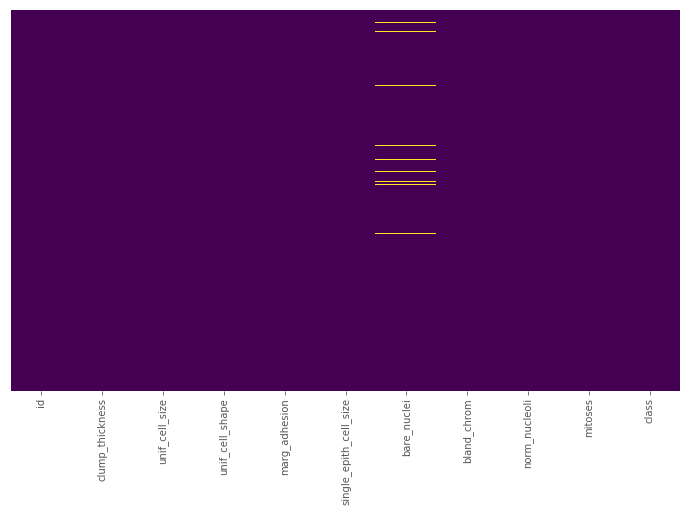

In [3]:
# Verifying possible missing values on data

null_breastCancer = breastCancer.replace('?', np.nan)

plt.figure(figsize=(12,7))
sns.heatmap(null_breastCancer.isnull(), yticklabels=False, cbar=False, cmap='viridis')

## 1. Data pre-processing

### 1.1 Initial assessment

In [4]:
# Libraries required to this task
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import boxcox

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness           683 non-null int64
unif_cell_size            683 non-null int64
unif_cell_shape           683 non-null int64
marg_adhesion             683 non-null int64
single_epith_cell_size    683 non-null int64
bare_nuclei               683 non-null int64
bland_chrom               683 non-null int64
norm_nucleoli             683 non-null int64
mitoses                   683 non-null int64
class                     683 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB


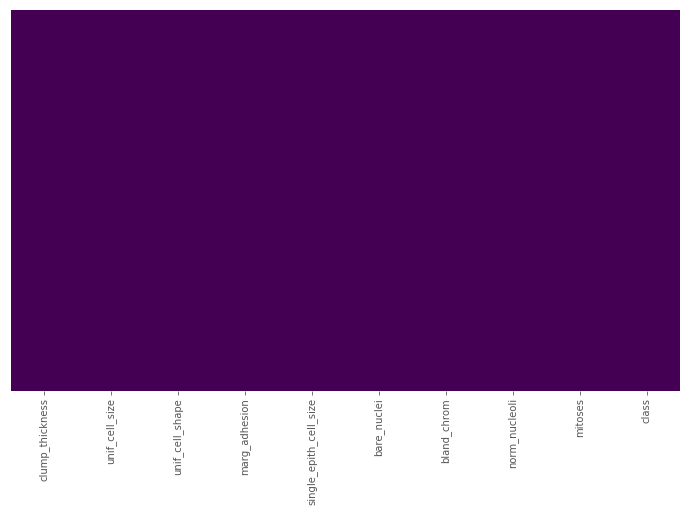

In [5]:
# Handling with missing data ('?') and dropping the id collum in order to avoid outlier interference

# Reduce atribute of dataset - id - isn't necessary to model building
breastCancer.drop(['id'], 1, inplace=True)

# Discarding rows with missing values
breastCancer = breastCancer[breastCancer.bare_nuclei != '?']

breastCancer['bare_nuclei'] = breastCancer['bare_nuclei'].astype(str).astype(int)

breastCancer.info()

# Now we see clearly that missing values were wiped out
null_breastCancer = breastCancer.replace('?', np.nan)

plt.figure(figsize=(12,7))
sns.heatmap(null_breastCancer.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
#Evaluation of the statistical metrics on the data
table = breastCancer.describe()
table.loc['skew'] = breastCancer.skew()
table

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000
skew,0.587654,1.226404,1.157890,1.509181,1.703716,0.990016,1.095270,1.420431,3.511476,0.630694


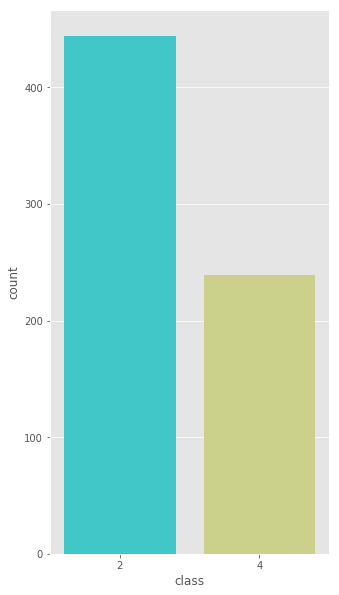

In [7]:
#Class distribution
plt.figure(figsize=(5,10))
sns.countplot(x='class', data=breastCancer, palette='rainbow')

### 1.2 Solving Skewness
We clarely see that data suffers from a skewness distribution along the attributes. We will employ Box-Cox transformation to solve this problem.

In [8]:
# Resolve the skewness using Box-Cox Transformation
def BoxCoxTransf(df, columns_to_transform):
    for column in columns_to_transform:
        df[column], maxlog = boxcox(df[column], lmbda=None)

    return df

names = breastCancer.columns.drop('class')

transf_breastCancer = BoxCoxTransf(df=breastCancer, columns_to_transform=names)

table = transf_breastCancer.describe()
table.loc['skew'] = transf_breastCancer.skew()
table

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.709224,0.414727,0.486793,0.324945,0.739252,0.384067,0.939466,0.261332,0.042775,2.699854
std,1.137973,0.474108,0.521913,0.391960,0.325872,0.473046,0.649389,0.350103,0.092759,0.954592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,0.784402,0.000000,0.000000,0.000000,0.585984,0.000000,0.674827,0.000000,0.000000,2.000000
50%,1.784029,0.000000,0.000000,0.000000,0.585984,0.000000,1.053064,0.000000,0.000000,2.000000
75%,2.491510,0.953376,1.044891,0.774400,1.000635,0.957814,1.512946,0.696191,0.000000,4.000000
max,3.538269,1.124869,1.268487,0.940998,1.368867,1.059666,2.108506,0.813033,0.248882,4.000000
skew,-0.094957,0.389596,0.300147,0.489203,0.018764,0.499497,0.018070,0.658688,1.711433,0.630694


### 1.3 Standardizing the data

In [9]:
# Standardize the data

scaler = MinMaxScaler()

scaled_breastCancer = pd.DataFrame(scaler.fit_transform(transf_breastCancer), columns=transf_breastCancer.columns)

table = scaled_breastCancer.describe()
table.loc['skew'] = breastCancer.skew()
table

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,0.483068,0.368690,0.383759,0.345320,0.540047,0.362442,0.445560,0.321429,0.171869,0.349927
std,0.321618,0.421478,0.411445,0.416536,0.238059,0.446410,0.307985,0.430613,0.372705,0.477296
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221691,0.000000,0.000000,0.000000,0.428080,0.000000,0.320050,0.000000,0.000000,0.000000
50%,0.504210,0.000000,0.000000,0.000000,0.428080,0.000000,0.499436,0.000000,0.000000,0.000000
75%,0.704161,0.847544,0.823730,0.822956,0.730995,0.903883,0.717544,0.856289,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
skew,-0.094957,0.389596,0.300147,0.489203,0.018764,0.499497,0.018070,0.658688,1.711433,0.630694


In [10]:
breastCancer = scaled_breastCancer

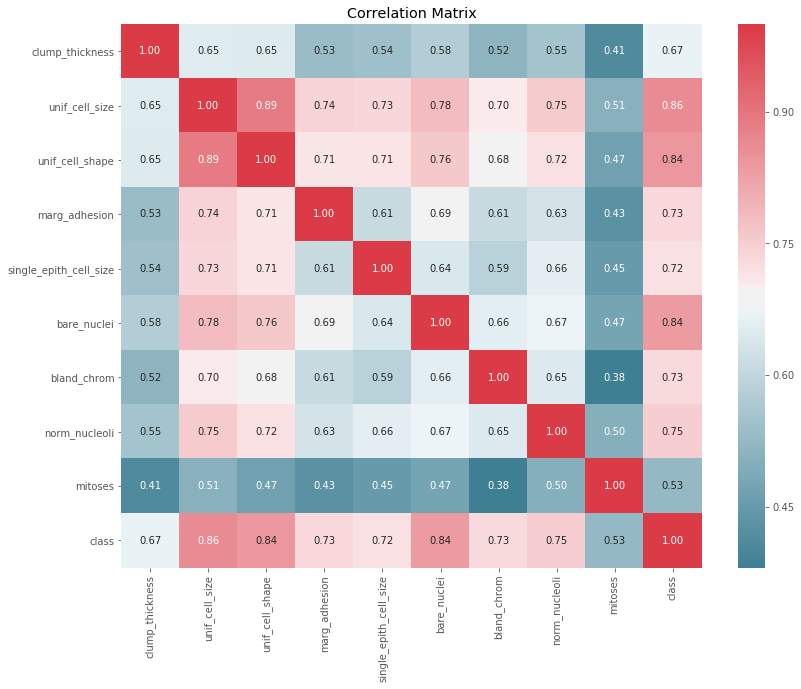

In [11]:
plt.figure(figsize=(13,10))
plt.title('Correlation Matrix')
sns.heatmap(breastCancer.corr(method='pearson'), annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 10, as_cmap=True))

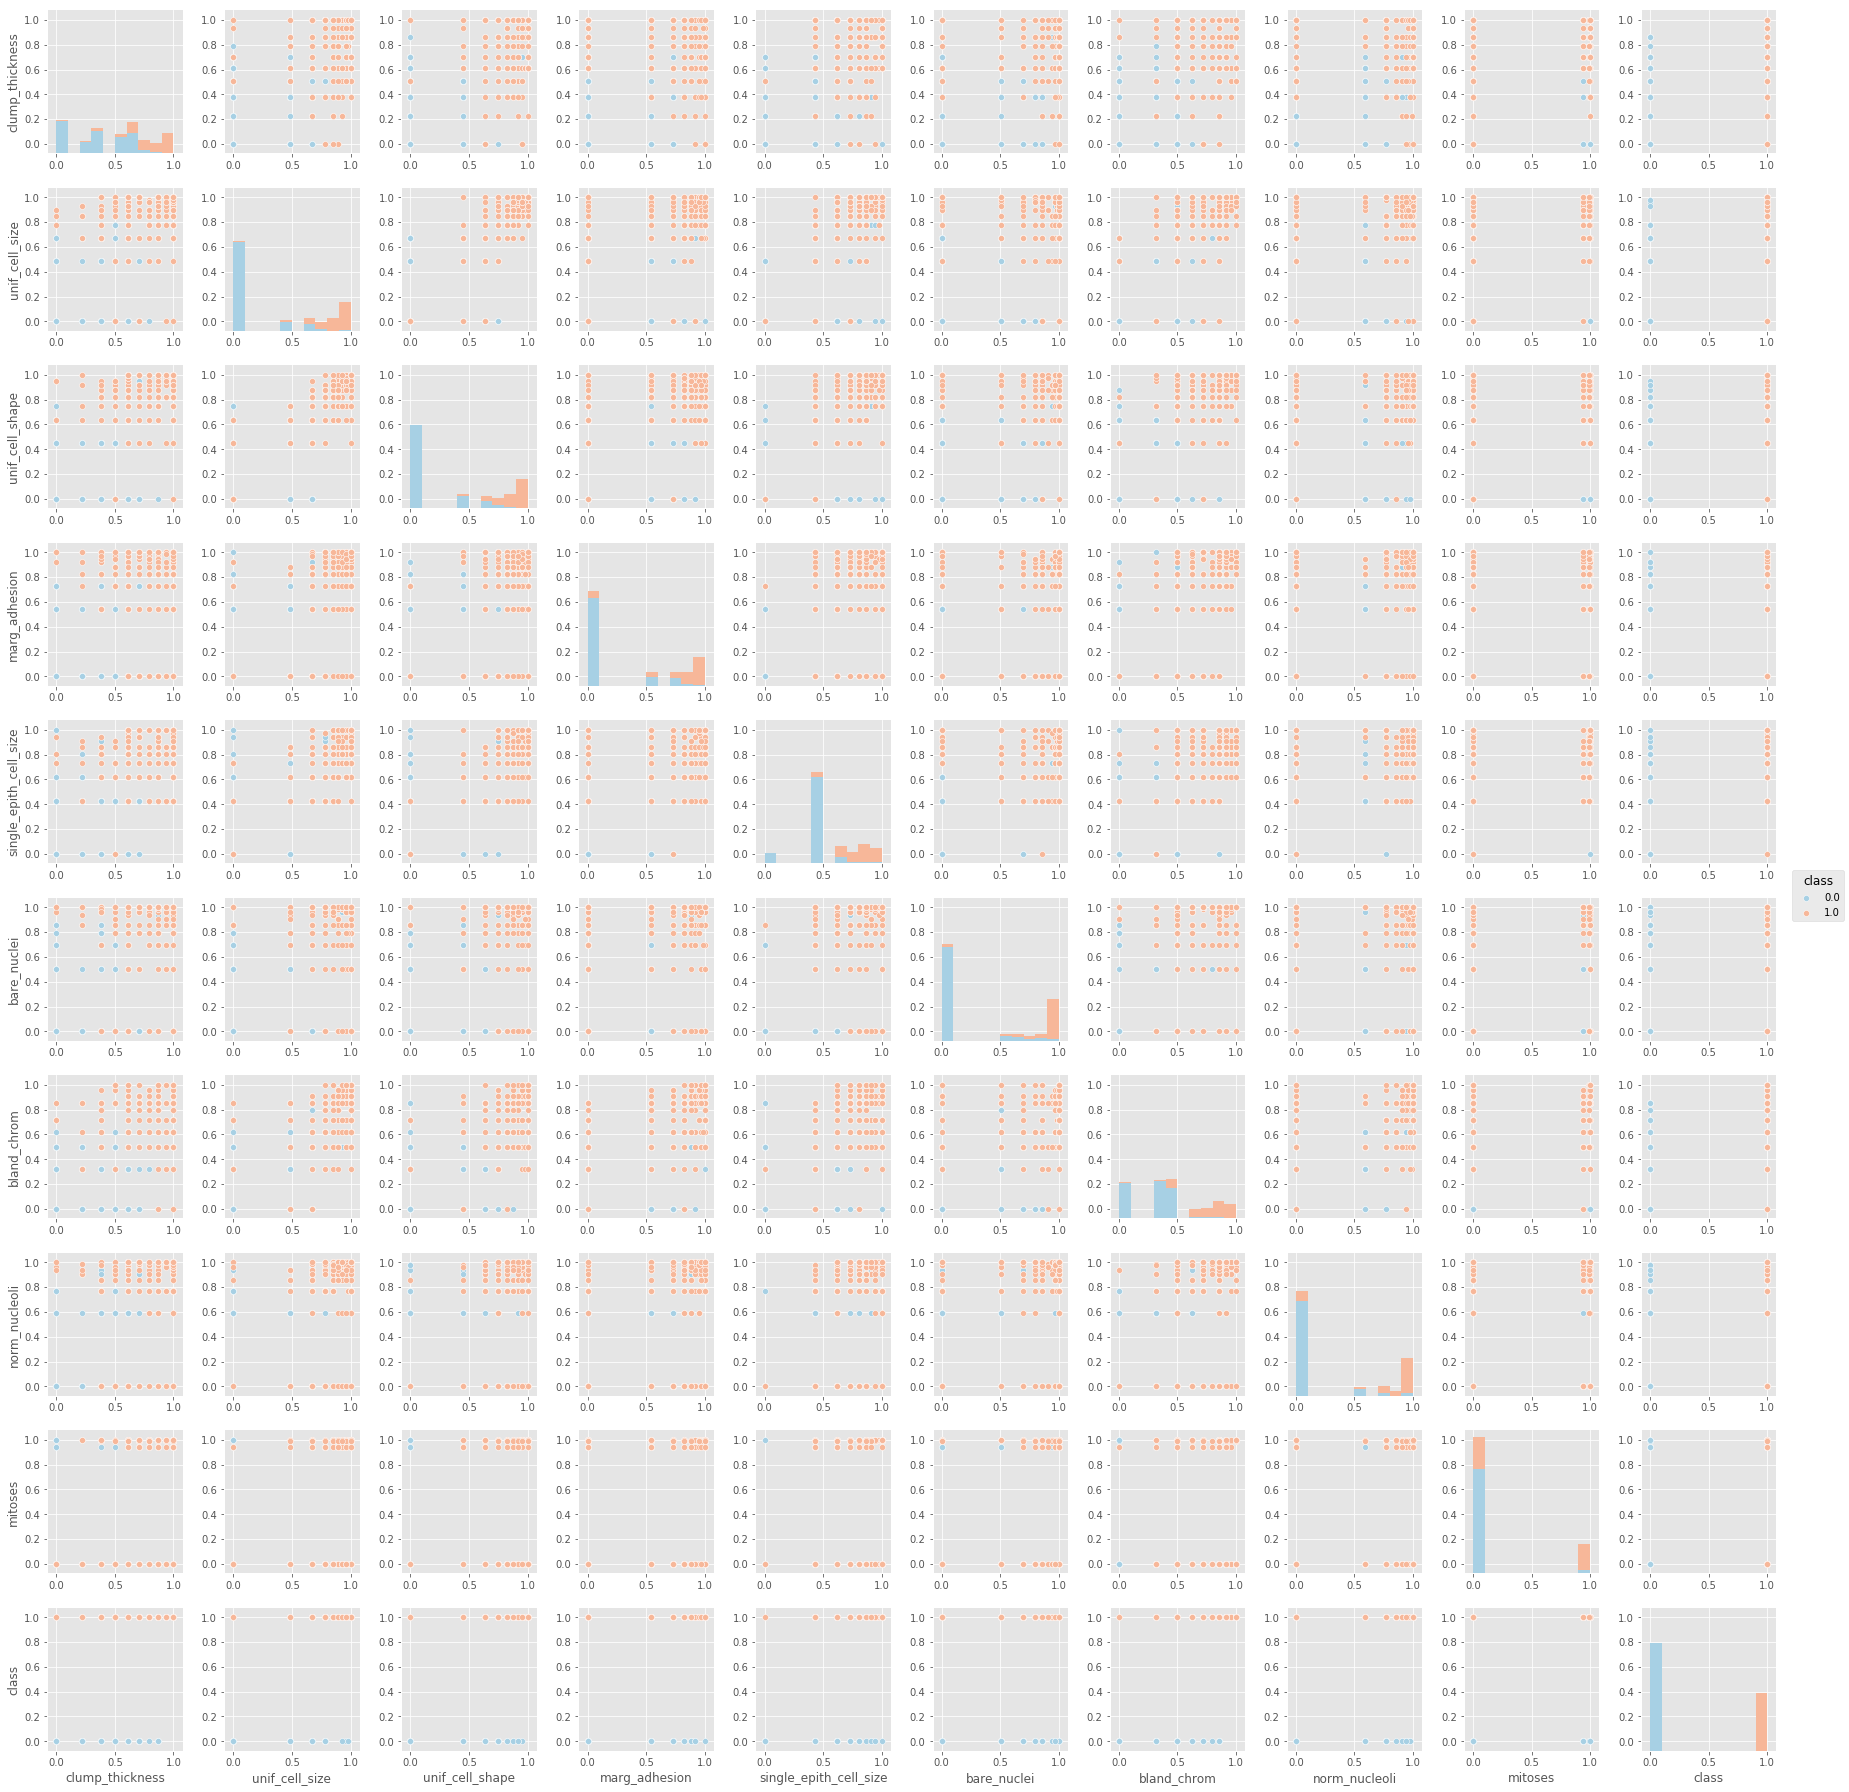

In [12]:
sns.pairplot(data=breastCancer, hue='class', palette='RdBu_r')

## 2. Data split to modeling process

### 2.1 Initial procedures

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import metrics
from ggplot import *
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from itertools import cycle

/home/zephyrw/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:66: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/home/zephyrw/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/home/zephyrw/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
# Functions required for evaluation

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
# ROC   
def show_roc(Xtest, ytest, clf):
    preds = clf.predict_proba(Xtest)[:,1]
    fpr, tpr, _ = metrics.roc_curve(ytest, preds)

    df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
    g = ggplot(df, aes(x='fpr', y='tpr')) +\
        geom_line() +\
        geom_abline(linetype='dashed') 
        
    print(g)

def outcome(y_test, y_predict, title, color):
    #color = plt.cm.Colors
    titlelabel = 'Confusion Matrix\n' + title
    
    print(classification_report(y_test, y_predict))
    conf_matrix = confusion_matrix(y_test, y_predict)
    classes_names = ['Benign', 'Malignant']

    plt.figure(figsize=(12,7))
    plot_confusion_matrix(cm=conf_matrix, classes=classes_names, normalize=False,
                          title=titlelabel, 
                          cmap=color)
    
def overall_result(methods_list,results_list):
    results = {'Method': methods_list, 
    'Accuracy (%)':results_list}

    df = pd.DataFrame(data=results)
    df.set_index('Method', inplace=True)
    
    return df

### 2.2 Data splitting

In [15]:
#Train-test data split

predictors = breastCancer.columns.drop('class')

X = breastCancer[['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size', 
                  'bare_nuclei', 'bland_chrom', 'norm_nucleoli']]

# [predictors]
#['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion', 'single_epith_cell_size', 
#                  'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses']


y = breastCancer['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

## 3. Building of Linear Classification Models

### 3.1 Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

#### Training

In [17]:
logisticReg = LogisticRegression()
logisticReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [18]:
y_predict = logisticReg.predict(X_test)

#### Outcome

             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97       127
        1.0       0.95      0.95      0.95        78

avg / total       0.96      0.96      0.96       205

Confusion matrix, without normalization
[[123   4]
 [  4  74]]


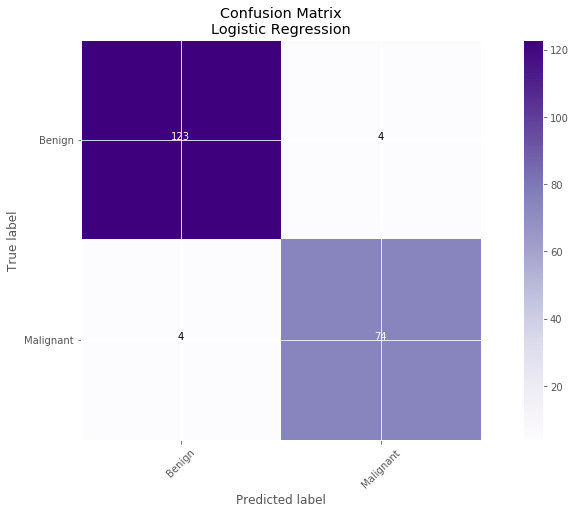

In [19]:
logreg_accuracy = 100 * (accuracy_score(y_test, y_predict))
logreg_accuracy = round(logreg_accuracy, 2)
outcome(y_test, y_predict,'Logistic Regression',plt.cm.Purples)

In [20]:
#show_roc(Xtest=X_test, ytest=y_test, clf=logisticReg)

### 3.2 Linear Discriminant Analysis

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

#### Training

In [22]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [23]:
y_predict = lda.predict(X_test)

#### Outcome

             precision    recall  f1-score   support

        0.0       0.98      0.97      0.97       127
        1.0       0.95      0.96      0.96        78

avg / total       0.97      0.97      0.97       205

Confusion matrix, without normalization
[[123   4]
 [  3  75]]


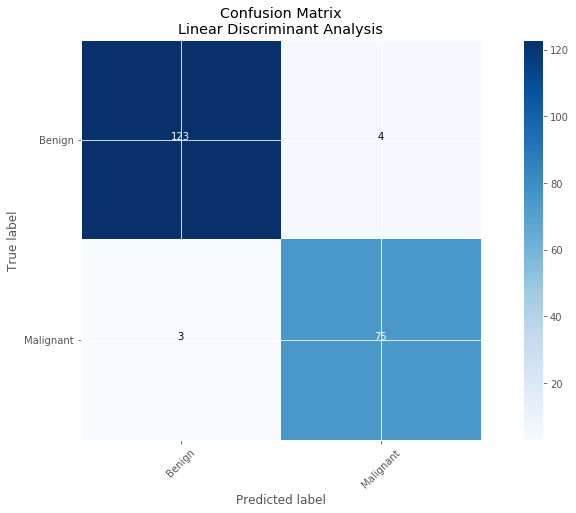

In [24]:
linDiscr_accuracy = 100 * (accuracy_score(y_test, y_predict))
linDiscr_accuracy = round(linDiscr_accuracy, 2)
outcome(y_test, y_predict,'Linear Discriminant Analysis',plt.cm.Blues)


## 4. Building of Non-linear Classification Models

In [25]:
from sklearn.model_selection import cross_val_score

### 4.1 Quadratic Discriminant Analysis

In [26]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

#### Training

In [27]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [28]:
y_predict = qda.predict(X_test)

#### Outcome

             precision    recall  f1-score   support

        0.0       0.98      0.97      0.98       127
        1.0       0.95      0.97      0.96        78

avg / total       0.97      0.97      0.97       205

Confusion matrix, without normalization
[[123   4]
 [  2  76]]


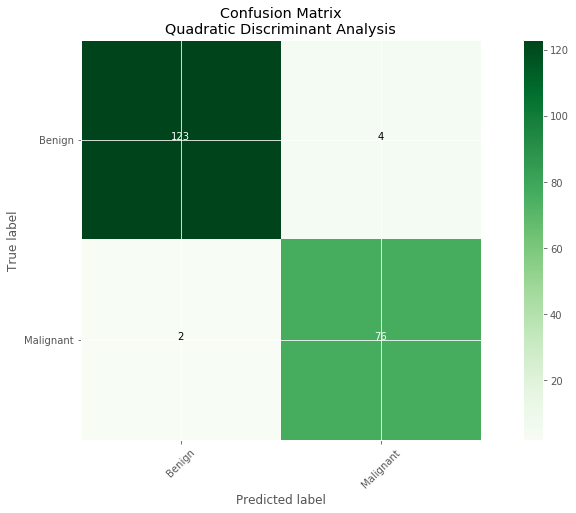

In [29]:
outcome(y_test, y_predict,'Quadratic Discriminant Analysis',plt.cm.Greens)

#### Cross-validation

In [30]:
qda = QuadraticDiscriminantAnalysis()

scores = cross_val_score(qda, X, y, scoring='accuracy', cv = 10)

print(scores)
qda_accuracy = round(100*scores.mean(), 2)
print('Mean accuracy using 10-fold cross-validation: {}%'.format(qda_accuracy))

[ 0.97101449  0.95652174  0.95652174  0.94202899  0.97058824  0.92647059
  0.98529412  1.          0.98529412  0.98507463]
Mean accuracy using 10-fold cross-validation: 96.79%


### 4.2 K-Nearest Neighbors

In [31]:
from sklearn.neighbors import KNeighborsClassifier

#### Training

In [32]:
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform')

In [33]:
y_predict = knn.predict(X_test)

#### Outcomes

             precision    recall  f1-score   support

        0.0       0.99      0.97      0.98       127
        1.0       0.95      0.99      0.97        78

avg / total       0.98      0.98      0.98       205

Confusion matrix, without normalization
[[123   4]
 [  1  77]]


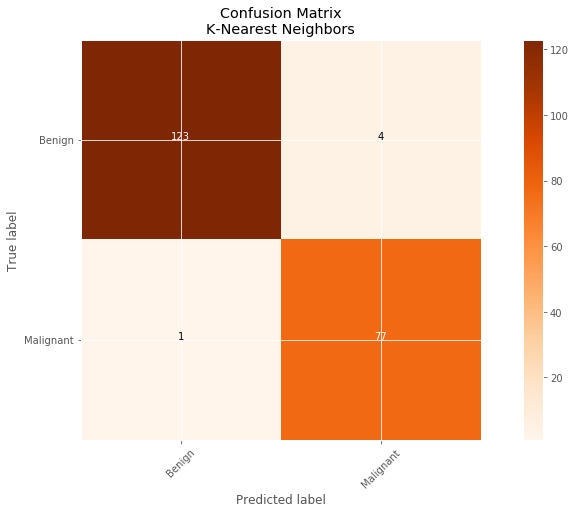

In [34]:
outcome(y_test, y_predict,'K-Nearest Neighbors',plt.cm.Oranges)

#### Cross-validation

In [35]:
#10-fold CV KNN with k=5

knn = KNeighborsClassifier(n_neighbors=26)

scores = cross_val_score(knn, X, y, scoring='accuracy', cv = 10)

print(scores)
knn_accuracy = round(100*scores.mean(), 2)
print('Mean accuracy using 10-fold cross-validation: {}%'.format(knn_accuracy))

[ 0.97101449  0.97101449  0.95652174  0.94202899  0.97058824  0.95588235
  0.98529412  0.98529412  0.98529412  1.        ]
Mean accuracy using 10-fold cross-validation: 97.23%


Text(0,0.5,'Cross validated accuracy')

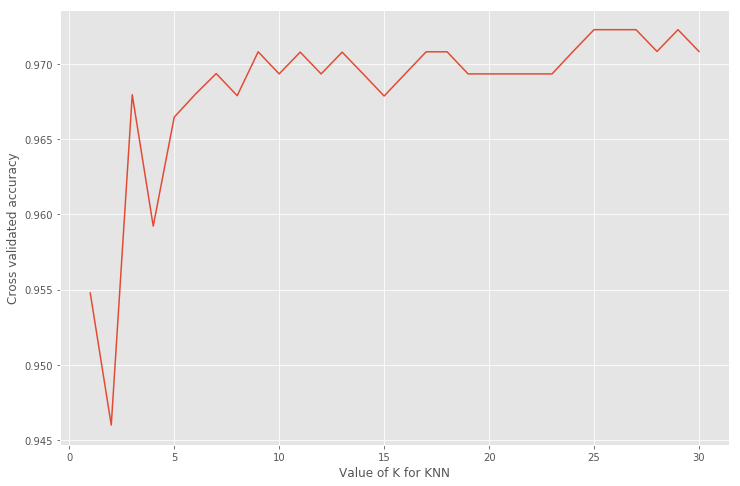

In [36]:
# Looking for the best K value that provides the best accuracy
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
    
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross validated accuracy')


### 4.3 Support Vector Machines

In [37]:
from sklearn import svm

#### Training

In [38]:
svm = svm.SVC(kernel='linear', C=0.45, gamma=1)

svm.fit(X_train, y_train)

SVC(C=0.45, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [39]:
y_predict = svm.predict(X_test)

#### Outcomes

             precision    recall  f1-score   support

        0.0       0.99      0.98      0.98       127
        1.0       0.96      0.99      0.97        78

avg / total       0.98      0.98      0.98       205

Confusion matrix, without normalization
[[124   3]
 [  1  77]]


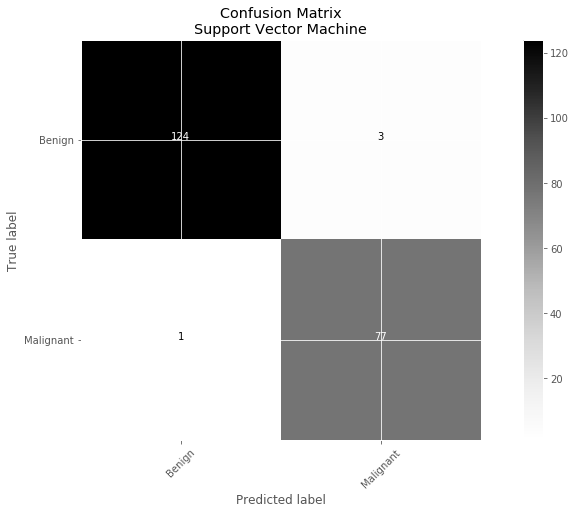

In [40]:
outcome(y_test, y_predict,'Support Vector Machine',plt.cm.Greys)

In [41]:
from sklearn import svm
svm = svm.SVC(kernel='linear', C=0.45, gamma=1)
scores = cross_val_score(svm, X, y, scoring='accuracy', cv = 10)

print(scores)
svm_accuracy = round(100*scores.mean(), 2)
print('Mean accuracy using 10-fold cross-validation: {}%'.format(svm_accuracy))

[ 0.97101449  0.98550725  0.95652174  0.94202899  0.97058824  0.97058824
  0.98529412  0.98529412  0.98529412  0.98507463]
Mean accuracy using 10-fold cross-validation: 97.37%


### 4.4 Neural Networks

In [42]:
from sklearn.neural_network import MLPClassifier

#### Training

In [43]:
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', learning_rate="adaptive", max_iter=2000)

nn.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=2000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [44]:
y_predict = nn.predict(X_test)

#### Outcomes

             precision    recall  f1-score   support

        0.0       0.98      0.98      0.98       127
        1.0       0.96      0.97      0.97        78

avg / total       0.98      0.98      0.98       205

Confusion matrix, without normalization
[[124   3]
 [  2  76]]


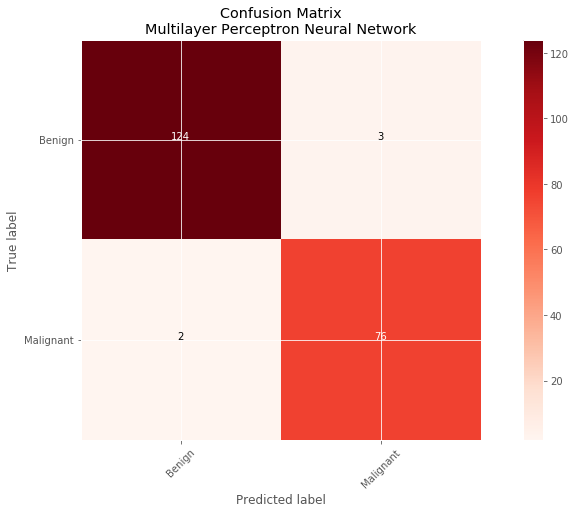

In [45]:
outcome(y_test, y_predict,'Multilayer Perceptron Neural Network',plt.cm.Reds)

#### Model tuning using K-fold Cross Validation

In [46]:
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', learning_rate="adaptive", max_iter=1800)

scores = cross_val_score(nn, X, y, scoring='accuracy', cv = 10)

print(scores)
nn_accuracy = round(100*scores.mean(), 2)
print('Mean accuracy using 10-fold cross-validation: {}%'.format(nn_accuracy))

[ 0.95652174  0.97101449  0.95652174  0.94202899  0.97058824  0.95588235
  0.98529412  0.98529412  0.97058824  0.98507463]
Mean accuracy using 10-fold cross-validation: 96.79%


## 5. Overall comparison of the methods

In [47]:
linear_methods = ['Logistic Regression', 'Linear Discriminant Analysis']
linear_results = [logreg_accuracy, linDiscr_accuracy]

overall_result(methods_list=linear_methods, results_list=linear_results)

,Accuracy (%)
Method,
Logistic Regression,96.10
Linear Discriminant Analysis,96.59


In [48]:
nonlinear_methods = ['Quadratic Discriminant Analysis','K-Nearest Neighbors','Support Vectors Machine',
               'Multilayer Perceptron Neural Network']
nonlinear_results = [qda_accuracy, knn_accuracy, svm_accuracy, nn_accuracy]

overall_result(nonlinear_methods, nonlinear_results)

,Accuracy (%)
Method,
Quadratic Discriminant Analysis,96.79
K-Nearest Neighbors,97.23
Support Vectors Machine,97.37
Multilayer Perceptron Neural Network,96.79


In [49]:
def overall_performance(linear_results, nonlinear_results):
    L = linear_results
    L.extend(nonlinear_results)
    
    avg = sum(L)/len(L)
    
    return avg

avg_lin = sum(linear_results)/len(linear_results)
avg_nlin = sum(nonlinear_results)/len(nonlinear_results)
total = overall_performance(linear_results, nonlinear_results)

print('Overall results:\nAverage accuracy to linear models: {}%\nAverage accuracy to non linear methods: {}%'.format(avg_lin, avg_nlin))
print('Average accuracy to all models: {}%'.format(total))

Overall results:
Average accuracy to linear models: 96.345%
Average accuracy to non linear methods: 97.045%
Average accuracy to all models: 96.81166666666667%
